In [2]:
from sklearn.datasets import make_classification

X, Y = make_classification(n_samples = 2000, n_classes= 2, weights = [1,1], random_state = 1)

In [3]:
X.shape

(2000, 20)

In [4]:
Y.shape

(2000,)

In [25]:
from sklearn.model_selection import train_test_split
X_train,Y_train,X_test,Y_test = train_test_split(X,Y,test_size = 0.3,random_state = 1)

In [7]:
X_train.shape

(1400, 20)

In [21]:
Y_test.shape

(600,)

# RANDOMFOREST

In [31]:
#### Randomforest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,roc_curve
rf_model = RandomForestClassifier()
rf_model.fit(X_train,X_test)
YTrain_pred = rf_model.predict_proba(X_train)
print("RF train roc - auc {}".format(roc_auc_score(X_test,YTrain_pred[:,1])))
YTest_pred = rf_model.predict_proba(Y_train)
print("RF train roc - auc {}".format(roc_auc_score(Y_test,YTest_pred[:,1])))


RF train roc - auc 0.9999448969470868
RF train roc - auc 0.9724111111111111


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# Logistic Regression

In [32]:
#### Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve
log_model = LogisticRegression()
log_model.fit(X_train,X_test)
YTrain_pred = log_model.predict_proba(X_train)
print("Logistics train roc - auc {}".format(roc_auc_score(X_test,YTrain_pred[:,1])))
YTest_pred = log_model.predict_proba(Y_train)
print("Logistics train roc - auc {}".format(roc_auc_score(Y_test,YTest_pred[:,1])))


C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


RF train roc - auc 0.9863589331232614
RF train roc - auc 0.9885777777777777


# AdaBoost Classifier

In [34]:
#### AdaBoost Classifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score,roc_curve
Ada_model = AdaBoostClassifier()
Ada_model.fit(X_train,X_test)
YTrain_pred = Ada_model.predict_proba(X_train)
print("AdaBoost train roc - auc {}".format(roc_auc_score(X_test,YTrain_pred[:,1])))
YTest_pred = Ada_model.predict_proba(Y_train)
print("AdaBoost train roc - auc {}".format(roc_auc_score(Y_test,YTest_pred[:,1])))


AdaBoost train roc - auc 0.9975081174960356
AdaBoost train roc - auc 0.9826111111111111


# KNN Classifier

In [35]:
#### KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score,roc_curve
knn_model = KNeighborsClassifier()
knn_model.fit(X_train,X_test)
YTrain_pred = knn_model.predict_proba(X_train)
print("KNN train roc - auc {}".format(roc_auc_score(X_test,YTrain_pred[:,1])))
YTest_pred = knn_model.predict_proba(Y_train)
print("KNN train roc - auc {}".format(roc_auc_score(Y_test,YTest_pred[:,1])))


KNN train roc - auc 0.981670071491109
KNN train roc - auc 0.9426111111111111


In [42]:
### find the best threshold
pred = []
for models in [rf_model,log_model,Ada_model,knn_model]:
    pred.append(pd.Series(models.predict_proba(Y_train)[:,1]))
    
final_prediction = pd.concat(pred,axis=1).mean(axis =1)
print("Ensemble test roc-auc: {}".format(roc_auc_score(Y_test,final_prediction)))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Ensemble test roc-auc: 0.9834


In [44]:
#### Calculate the roc curve
fpr, tpr, thresholds = roc_curve(Y_test,final_prediction)
thresholds

array([1.91344129, 0.91344129, 0.9117242 , 0.91077267, 0.83124177,
       0.830555  , 0.81941218, 0.81907151, 0.78995949, 0.78782624,
       0.7687895 , 0.76820261, 0.68994214, 0.68849235, 0.67979186,
       0.67718131, 0.64585994, 0.6437815 , 0.60172764, 0.59762509,
       0.59609778, 0.59222851, 0.58445998, 0.58201661, 0.55973191,
       0.5586407 , 0.55378347, 0.54685161, 0.52875922, 0.52865575,
       0.52293569, 0.51870183, 0.47312654, 0.46805366, 0.4440538 ,
       0.43062689, 0.42146096, 0.41212534, 0.40873479, 0.3848282 ,
       0.38342204, 0.37964882, 0.36053337, 0.24696586, 0.24612022,
       0.24368475, 0.24315777, 0.21603952, 0.21596876, 0.11794908,
       0.11783509, 0.10498954])

In [45]:
### Select the thresholds
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(Y_test,y_pred, normalize = True))
    
accuracy_ls = pd.concat([pd.Series(thresholds),pd.Series(accuracy_ls)],axis = 1)
accuracy_ls.columns = ["thresholds","accuracy"]
accuracy_ls.sort_values(by="accuracy",ascending = False, inplace = True)
accuracy_ls.head()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,thresholds,accuracy
35,0.430627,0.958333
37,0.412125,0.956667
36,0.421461,0.956667
34,0.444054,0.956667
33,0.468054,0.956667


In [46]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr,tpr, color = "orange", label = "ROC")
    plt.plot([0,1],[0,1],color = "darkblue", linestyle = '--')
    plt.xlabel("False Positive rate")
    plt.ylabel("True Positive rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

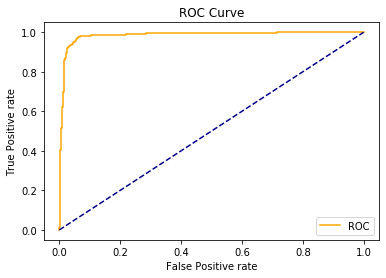

In [47]:
plot_roc_curve(fpr,tpr)